In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.tools import diff
%matplotlib inline

In [2]:
airline=pd.read_csv('../Data/airline_passengers.csv',index_col='Month', parse_dates=True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
airline.index.freq='MS'
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [4]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [5]:
airline.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [6]:
train_set=airline.iloc[:109]
test_set=airline.iloc[109:]
print(train_set.shape,test_set.shape)

(109, 1) (35, 1)


In [7]:
train_set.tail()

,Thousands of Passengers
Month,
1957-09-01,404
1957-10-01,347
1957-11-01,305
1957-12-01,336
1958-01-01,340


In [8]:
test_set.head()

,Thousands of Passengers
Month,
1958-02-01,318
1958-03-01,362
1958-04-01,348
1958-05-01,363
1958-06-01,435


In [9]:
fitted_model=ExponentialSmoothing(train_set['Thousands of Passengers'],
                                 trend='mul',
                                 seasonal='mul',
                                 seasonal_periods=12).fit()

In [10]:
test_pred=fitted_model.forecast(35)

/home/ubuntu/python3.6_virtual_env/CISCO_forecasting/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/home/ubuntu/python3.6_virtual_env/CISCO_forecasting/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/home/ubuntu/python3.6_virtual_env/CISCO_forecasting/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [11]:
test_pred.head()

1958-02-01    331.649487
1958-03-01    388.989627
1958-04-01    380.125238
1958-05-01    388.290921
1958-06-01    453.379208
Freq: MS, dtype: float64

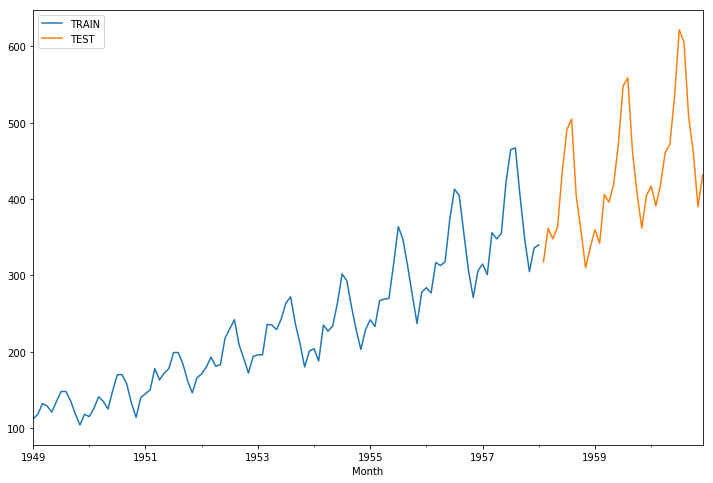

In [12]:
train_set['Thousands of Passengers'].plot(legend=True, label='TRAIN',figsize=(12,8))
test_set['Thousands of Passengers'].plot(legend=True, label='TEST')

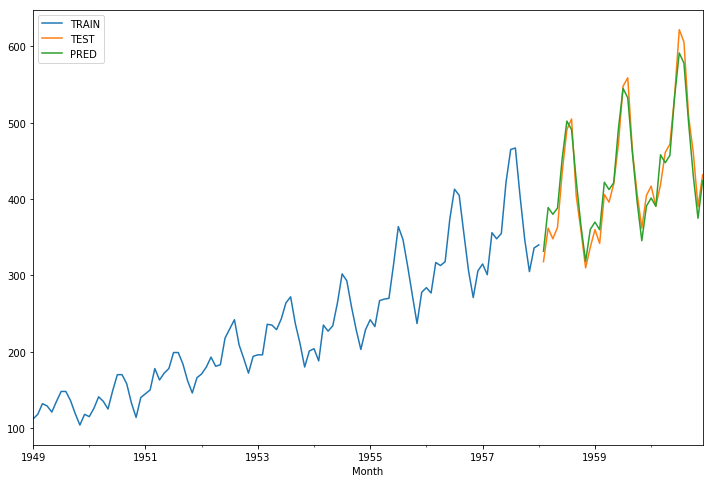

In [13]:
train_set['Thousands of Passengers'].plot(legend=True, label='TRAIN',figsize=(12,8))
test_set['Thousands of Passengers'].plot(legend=True, label='TEST')
test_pred.plot(legend=True, label='PRED');

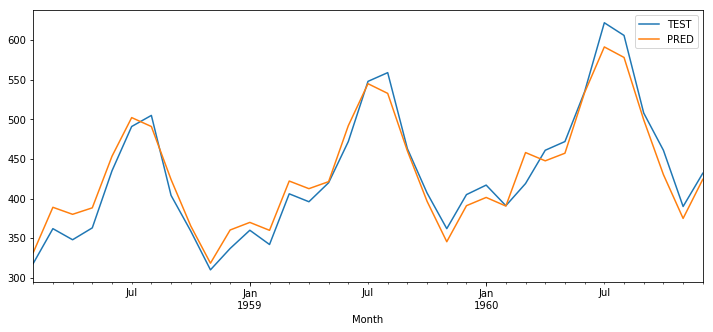

In [14]:
test_set['Thousands of Passengers'].plot(legend=True, label='TEST',figsize=(12,5))
test_pred.plot(legend=True, label='PRED');

In [15]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 1958-02-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
Thousands of Passengers    35 non-null int64
dtypes: int64(1)
memory usage: 560.0 bytes


In [16]:
test_set['Thousands of Passengers'].describe()

count     35.000000
mean     431.028571
std       79.001670
min      310.000000
25%      362.500000
50%      417.000000
75%      472.000000
max      622.000000
Name: Thousands of Passengers, dtype: float64

In [17]:
mean_absolute_error(test_set,test_pred)

15.97789836297441

In [18]:
mean_squared_error(test_set,test_pred)

346.03611385840856

In [19]:
#RMSE
np.sqrt(mean_squared_error(test_set,test_pred))

18.60204595893711

In [20]:
final_model=ExponentialSmoothing(airline['Thousands of Passengers'],
                                 trend='mul',
                                 seasonal='mul',
                                 seasonal_periods=12).fit()

In [21]:
forecast_prediction=final_model.forecast(35)

/home/ubuntu/python3.6_virtual_env/CISCO_forecasting/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/home/ubuntu/python3.6_virtual_env/CISCO_forecasting/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/home/ubuntu/python3.6_virtual_env/CISCO_forecasting/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


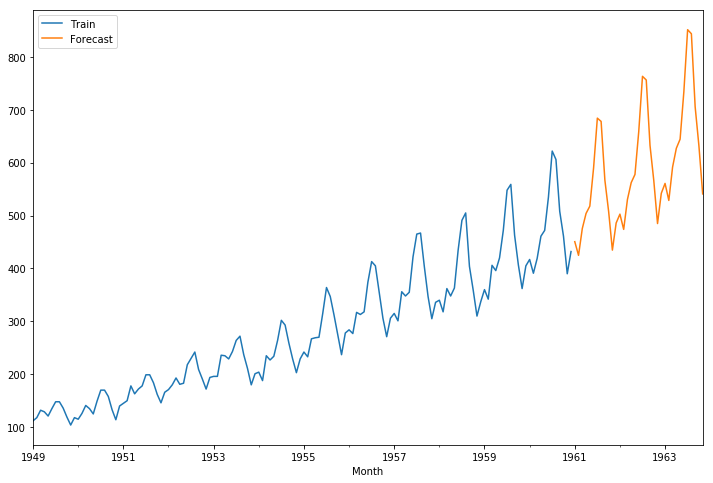

In [22]:
airline['Thousands of Passengers'].plot(legend=True, label='Train',figsize=(12,8))
forecast_prediction.plot(legend=True, label='Forecast');

In [23]:
df=pd.read_csv('../Data/samples.csv',index_col=0, parse_dates=True)
df.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


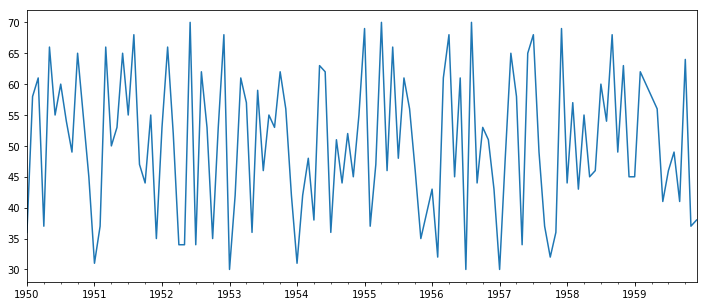

In [24]:
df['a'].plot(figsize=(12,5));

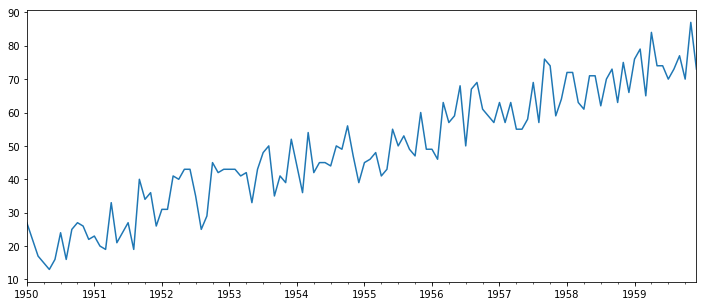

In [25]:
df['b'].plot(figsize=(12,5));

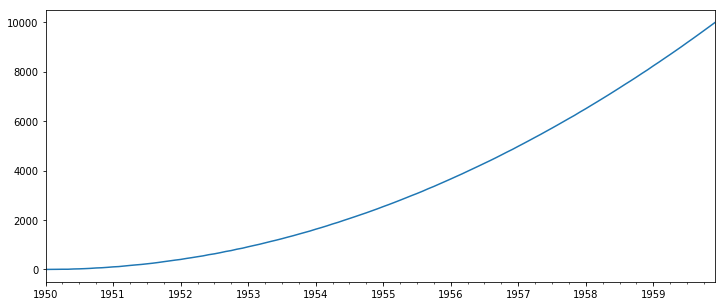

In [26]:
df['c'].plot(figsize=(12,5));

In [27]:
first_order_diff=df['b']-df['b'].shift(1)#first order difference
first_order_diff.head()

1950-01-01    NaN
1950-02-01   -5.0
1950-03-01   -5.0
1950-04-01   -2.0
1950-05-01   -2.0
Name: b, dtype: float64

In [28]:
diff(df['b'],k_diff=1).head()

1950-02-01   -5.0
1950-03-01   -5.0
1950-04-01   -2.0
1950-05-01   -2.0
1950-06-01    3.0
Name: b, dtype: float64

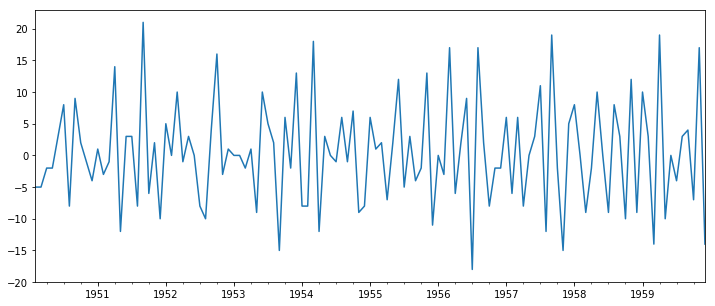

In [29]:
diff(df['b'],k_diff=1).plot(figsize=(12,5));